In [46]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf

In [47]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/data/dataset_anticede.csv')
df.head()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0
1,gua sange gatel yah tetek memeknya di ranjang ...,1,0,0,0,0
2,pertama kali denger lagunya enak bangitu in da...,0,0,0,0,1
3,astajim ini pasti yang kasih penghargaan ke ib...,0,1,0,1,0
4,kalo keberagamannya ada tapi ga dianggep banya...,0,0,0,0,1


In [49]:
df.tail()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
5995,kwkwkwkw lihat tuh kepala sekolah botak kayak ...,0,0,0,1,0
5996,Eh barusan temen gue satunya cerita katanya do...,0,0,0,0,1
5997,Ekhem tes tes satu dua. Halo sayang aku Phirel...,0,0,0,0,1
5998,Rejim PANIK? - Ulama kami kalian kriminalisasi...,0,0,1,1,0
5999,Hahaha sekali dua kali sih aku bisa ngerti apa...,0,0,0,1,0


In [50]:
df.iloc[0:1,]

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0


In [51]:
df.iloc[0]['original_text']

'BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUKU MEREKA dan lain lain ITU sudah SaNGAT jelas SaYa HERAN SaMa RaKYAT YanG MASIH TOLOL Udah Jelas ADA NIAT DaRi HTI YanG INGIN TEGAKKAN KHILAFAH dan GANTI NKRI MASIH NGELES GAK ADA LAH MAU TEGAKKAN KHILAFAH AJA MUNAFIK APANYA KHILAFAH'

In [52]:
df[df.columns[1:]].iloc[0:3]

,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,0,0,1,1,0
1,1,0,0,0,0
2,0,0,0,0,1


In [53]:
from tensorflow.keras.layers import TextVectorization
a = df['original_text']
b = df[df.columns[1:]].values


In [54]:
df.columns

Index(['original_text', 'pornografi', 'sara', 'radikalisme',
       'pencemaran_nama_baik', 'non_toxic'],
      dtype='object')

In [55]:
df.dtypes

original_text           object
pornografi               int64
sara                     int64
radikalisme              int64
pencemaran_nama_baik     int64
non_toxic                int64
dtype: object

In [56]:
# Change text to lowercase
def proses_data(text):
    newText = text.lower()
    return newText
# ini case kalau semua mau ngerun semua data Komputerku kentang maka ngefreeze)
# dataset['original_text'].apply(lambda x: print(x))
# ini case kalau semua mau ngerun 5 data pertama
data = df['original_text']
data = data.apply(lambda x: proses_data(x))
data.head()

0    bukan cuma spanduk prof video orasi mereka buk...
1    gua sange gatel yah tetek memeknya di ranjang ...
2    pertama kali denger lagunya enak bangitu in da...
3    astajim ini pasti yang kasih penghargaan ke ib...
4    kalo keberagamannya ada tapi ga dianggep banya...
Name: original_text, dtype: object

In [57]:
# menghilangkan link dan tag html yang kemungkinan masih ada di dataset
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
data = data.apply(lambda x: link_remover(x))

# menghilangkan tanda baca dan karakter spesial
def karakter_spesial(text):
    newText = re.sub('[^\w\s]', ' ', text)
    return newText
data = data.apply(lambda x: karakter_spesial(x))

# menghilangkan spasi berlebihan
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
data = data.apply(lambda x: Spasi_berlebihan(x))

data.tail(100)

5900    alamak  kehebohan tiap malam dengan dua eyang ...
5901    ku inget ayahku yang berpulang hampir 3 bulan ...
5902    the best of  dongeng sebelum tidur  makasih te...
5903    sekarang saya tidak bisa lagi menggantungkan s...
5904    selalu menyimpan pemikiran atau kekhawatiran h...
                              ...                        
5995    kwkwkwkw lihat tuh kepala sekolah botak kayak ...
5996    eh barusan temen gue satunya cerita katanya do...
5997    ekhem tes tes satu dua  halo sayang aku phirel...
5998    rejim panik    ulama kami kalian kriminalisasi...
5999    hahaha sekali dua kali sih aku bisa ngerti apa...
Name: original_text, Length: 100, dtype: object

In [58]:
# df[df.columns[1:]].values

In [59]:
MAX_WORD = 20000
MAX_SEQ = 1000

In [60]:
data = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')

In [61]:
data.adapt(a.values)

In [62]:
data('anjing kadal')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 139, 2667])>

In [63]:
data.get_vocabulary()

['',
 '[UNK]',
 'yang',
 'dan',
 'di',
 'itu',
 'ini',
 'ada',
 'orang',
 'ya',
 'ga',
 'dengan',
 'dari',
 'jadi',
 'tapi',
 'gak',
 'bisa',
 'juga',
 'sama',
 'gue',
 'aja',
 'aku',
 'tidak',
 'saya',
 'ke',
 'presiden',
 'lagi',
 'untuk',
 'mau',
 'kalo',
 'dia',
 'apa',
 'kita',
 'jokowi',
 'kalau',
 'lu',
 'karena',
 'agama',
 'nya',
 'mereka',
 'islam',
 'udah',
 'indonesia',
 'sudah',
 'jangan',
 'lain',
 'bukan',
 'akan',
 'lo',
 'dalam',
 'lebih',
 'semua',
 'banyak',
 'gitu',
 'pada',
 'kafir',
 'masih',
 'buat',
 'pak',
 'si',
 'kan',
 'kok',
 'kamu',
 'tak',
 'anak',
 'atau',
 'terus',
 'sih',
 'asing',
 'adalah',
 'punya',
 'cuma',
 'harus',
 'baru',
 'tau',
 'cina',
 'negara',
 'lah',
 'sekarang',
 'banget',
 'cebong',
 'seperti',
 'allah',
 'rakyat',
 'saja',
 'hanya',
 'dulu',
 'kayak',
 'ganti',
 'sendiri',
 'baik',
 'emang',
 'pake',
 'mana',
 'gua',
 'hari',
 'kristen',
 'kenapa',
 'malah',
 'oleh',
 'tuh',
 'salah',
 'pernah',
 'begitu',
 'tahun',
 'ahok',
 'nggak',

In [64]:
# download array_data as .txt
# with open("./data_array_word_anticede.txt", "w") as output:
    # output.write(str(data.get_vocabulary()))

In [65]:
kalimat_text = data(a.values)

In [66]:
len(a)

6000

In [67]:
kalimat_text

<tf.Tensor: shape=(6000, 1000), dtype=int64, numpy=
array([[   46,    71,  1785, ...,     0,     0,     0],
       [   94,   418, 14212, ...,     0,     0,     0],
       [  384,   142,  1067, ...,     0,     0,     0],
       ...,
       [14519,  1944,  1944, ...,     0,     0,     0],
       [ 2214,  2245,   121, ...,     0,     0,     0],
       [  330,   149,   405, ...,     0,     0,     0]])>

In [68]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(6000)
dataset = dataset.batch(20)

In [69]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [70]:
batch_b.shape

(20, 5)

In [71]:
train = dataset.take(int(len(dataset)*.8))
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [72]:
train.as_numpy_iterator().next()

(array([[ 165,   56, 3295, ...,    0,    0,    0],
        [ 435,   62,  931, ...,    0,    0,    0],
        [2575,    5,  240, ...,    0,    0,    0],
        ...,
        [ 485, 3877,   54, ...,    0,    0,    0],
        [ 633,   94,  933, ...,    0,    0,    0],
        [  10,  288, 1088, ...,    0,    0,    0]]), array([[0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0]]))

In [73]:
validation.as_numpy_iterator().next()

(array([[  608,  1326,  1136, ...,     0,     0,     0],
        [ 5090,   869,   694, ...,     0,     0,     0],
        [10777,  4891,   114, ...,     0,     0,     0],
        ...,
        [   34,  9763,    21, ...,     0,     0,     0],
        [ 2786,   900,   671, ...,     0,     0,     0],
        [ 9281,  4706,   126, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1]]))

In [74]:
test.as_numpy_iterator().next()

(array([[14436,   283,  4272, ...,     0,     0,     0],
        [  594,   192,   297, ...,     0,     0,     0],
        [ 2058,  2501,    14, ...,     0,     0,     0],
        ...,
        [   34,   135,     5, ...,     0,     0,     0],
        [13700,  2387,  3036, ...,     0,     0,     0],
        [  547,   430,   990, ...,     0,     0,     0]]),
 array([[1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0]]))

In [75]:
b[0]

array([0, 0, 1, 1, 0])

In [76]:
#make a model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(Bidirectional(LSTM(32, activation='tanh',)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          400020    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               13568     
 l)                                                              
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                        

In [77]:
EPOCHS = 10
history = model.fit(train, epochs=EPOCHS, validation_data=validation)

Epoch 1/10
240/240 [==============================] - 193s 782ms/step - loss: 0.4601 - accuracy: 0.4271 - val_loss: 0.3523 - val_accuracy: 0.5800
Epoch 2/10
240/240 [==============================] - 163s 679ms/step - loss: 0.3321 - accuracy: 0.5983 - val_loss: 0.2575 - val_accuracy: 0.7025
Epoch 3/10
240/240 [==============================] - 164s 684ms/step - loss: 0.2301 - accuracy: 0.7190 - val_loss: 0.1784 - val_accuracy: 0.7600
Epoch 4/10
240/240 [==============================] - 162s 676ms/step - loss: 0.1648 - accuracy: 0.7715 - val_loss: 0.1431 - val_accuracy: 0.8008
Epoch 5/10
240/240 [==============================] - 163s 679ms/step - loss: 0.1327 - accuracy: 0.8000 - val_loss: 0.1027 - val_accuracy: 0.8183
Epoch 6/10
240/240 [==============================] - 161s 670ms/step - loss: 0.1112 - accuracy: 0.8271 - val_loss: 0.0976 - val_accuracy: 0.8708
Epoch 7/10
240/240 [==============================] - 164s 685ms/step - loss: 0.0938 - accuracy: 0.8487 - val_loss: 0.0785 -

In [78]:
history.history

{'accuracy': [0.4270833432674408,
  0.5983333587646484,
  0.71895831823349,
  0.7714583277702332,
  0.800000011920929,
  0.8270833492279053,
  0.8487499952316284,
  0.856249988079071,
  0.8633333444595337,
  0.8654166460037231],
 'loss': [0.4600648581981659,
  0.33214712142944336,
  0.23007641732692719,
  0.16483020782470703,
  0.13271868228912354,
  0.11123263090848923,
  0.0938044935464859,
  0.08338375389575958,
  0.0726715624332428,
  0.06028120592236519],
 'val_accuracy': [0.5799999833106995,
  0.7024999856948853,
  0.7599999904632568,
  0.8008333444595337,
  0.8183333277702332,
  0.8708333373069763,
  0.8608333468437195,
  0.8525000214576721,
  0.8974999785423279,
  0.8666666746139526],
 'val_loss': [0.35227471590042114,
  0.2575106918811798,
  0.1784292608499527,
  0.14314906299114227,
  0.10273575037717819,
  0.09763607382774353,
  0.07854737341403961,
  0.06837306171655655,
  0.052584175020456314,
  0.04394498094916344]}

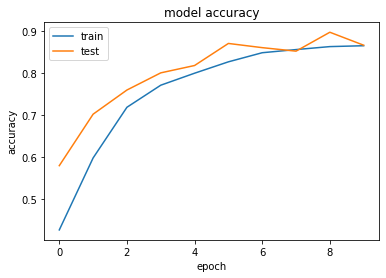

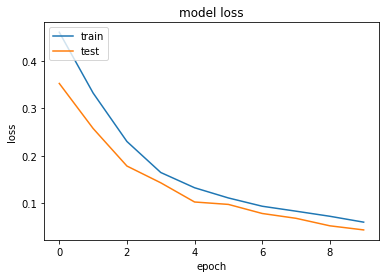

In [79]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
batch_c = test.as_numpy_iterator().next()

In [111]:
masukan_text = data('bodo banget sih diajarin gak bisa bisa')

In [112]:
model.predict(np.expand_dims(masukan_text,0))

array([[9.5191598e-04, 1.7693639e-04, 9.4676018e-04, 6.7080772e-01,
        4.2757046e-01]], dtype=float32)

In [113]:
# save model in h5 format
model.save('anticede_model.h5')

In [114]:
# convert file ke format .pb
import os

model_version = "1"
model_save = "anticede"
model_path = os.path.join(model_save, model_version)
tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: anticede/1/assets


INFO:tensorflow:Assets written to: anticede/1/assets


In [116]:
!zip -r log.zip log /content/anticede

	zip warning: name not matched: log
  adding: content/anticede/ (stored 0%)
  adding: content/anticede/1/ (stored 0%)
  adding: content/anticede/1/saved_model.pb (deflated 91%)
  adding: content/anticede/1/variables/ (stored 0%)
  adding: content/anticede/1/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/anticede/1/variables/variables.index (deflated 68%)
  adding: content/anticede/1/assets/ (stored 0%)


In [117]:
!ls -l {model_path}

total 2232
drwxr-xr-x 2 root root    4096 Jun  9 18:39 assets
-rw-r--r-- 1 root root 2276755 Jun  9 18:39 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  9 18:39 variables


In [118]:
# menampilkan saved model
!saved_model_cli show --dir {model_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['embedding_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, -1)
        name: serving_default_embedding_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_3'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 5)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          embedding